In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=100, noise=0.1,random_state=1)

In [3]:
X[:5]

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147]])

In [4]:
y[:5]

array([1, 1, 0, 1, 1], dtype=int64)

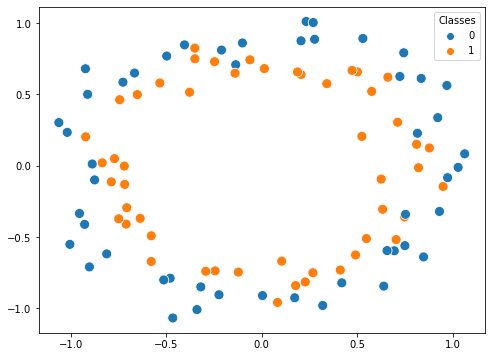

In [5]:
plt.figure(figsize=(8.,6))
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y,s=100)
plt.legend(title='Classes')

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
history = model.fit(X_train, y_train,epochs=3500,validation_data=(X_test,y_test),verbose=0)

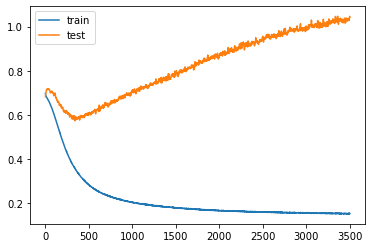

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [11]:
model2 = Sequential()
model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [12]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuarcy'])

In [13]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [14]:
history1 = model.fit(X_train, y_train,epochs=3500, validation_data=(X_test, y_test),callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 42ms/step - loss: 0.1521 - accuracy: 0.9250 - val_loss: 1.0447 - val_accuracy: 0.6500
Epoch 2/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.1513 - accuracy: 0.9250 - val_loss: 1.0427 - val_accuracy: 0.6500
Epoch 3/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.1505 - accuracy: 0.9250 - val_loss: 1.0404 - val_accuracy: 0.6500
Epoch 4/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.1515 - accuracy: 0.9500 - val_loss: 1.0376 - val_accuracy: 0.6500
Epoch 5/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.1511 - accuracy: 0.9500 - val_loss: 1.0347 - val_accuracy: 0.6500
Epoch 6/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.1509 - accuracy: 0.9500 - val_loss: 1.0305 - val_accuracy: 0.6500
Epoch 7/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.1518 - accuracy: 0.9375 - val_loss: 1.0274 - val_accuracy: 0.6500
Epoch 8/3500


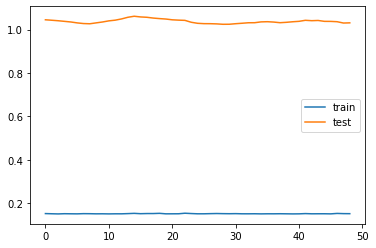

In [15]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()